## Multiple Linear Regression - Economics Dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
df = pd.read_csv('economic_index.csv')

In [83]:
df.shape

(24, 6)

In [84]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [85]:
### drop unnecessary column

df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [86]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [87]:
df.shape  ### 24 rows and 3 columns

(24, 3)

In [88]:
df.isnull().sum() ### Check missing (null) values

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [89]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


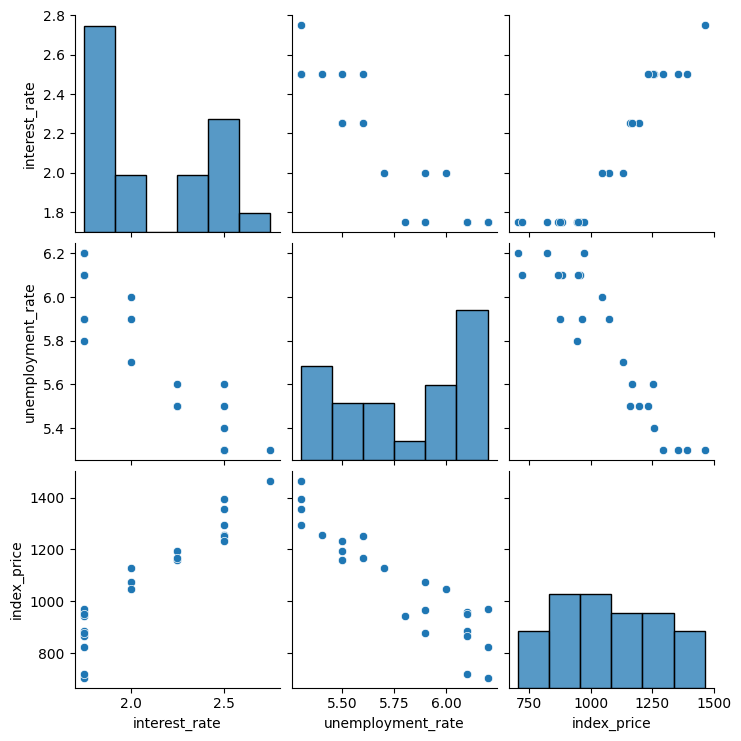

In [90]:
### visualization
import seaborn as sns

sns.pairplot(df)

Text(0, 0.5, 'Unemployment rate')

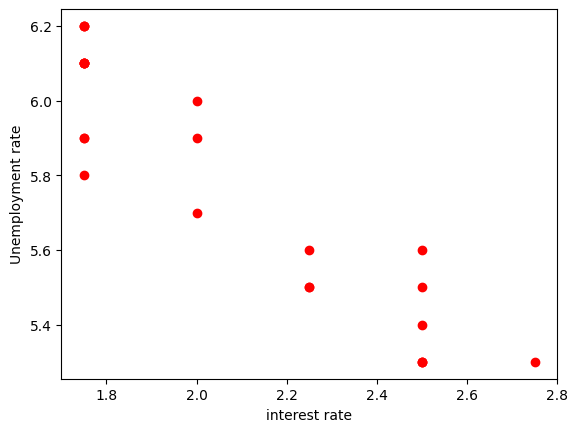

In [91]:
#### visualize more clearly

plt.scatter(x=df['interest_rate'], y=df['unemployment_rate'], color='red')
plt.xlabel('interest rate')
plt.ylabel('Unemployment rate')

In [92]:
### extracting independent variable

X = df.iloc[ : , :-1] ## select all rows and all columns except last column


### extracting dependent variable

y = df.iloc[ : , -1]  ## select all rows and only last column

In [93]:
X.shape

(24, 2)

In [94]:
y.shape

(24,)

In [95]:
type(y), type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

## Perform train and test split

In [96]:
### perform Train, test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
X_train.shape, X_test.shape

((18, 2), (6, 2))

<Axes: xlabel='interest_rate', ylabel='index_price'>

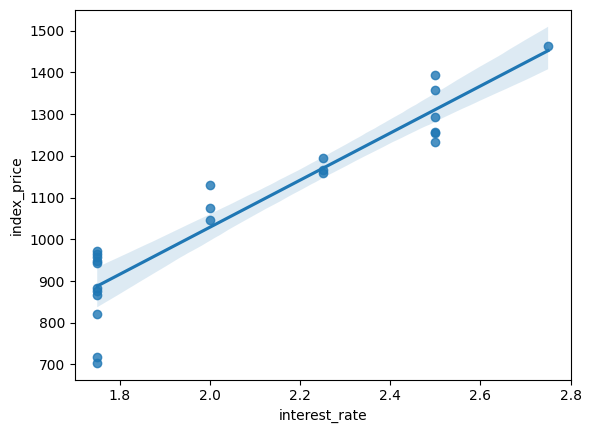

In [98]:
import seaborn as sns

sns.regplot(x=df['interest_rate'], y=df['index_price'])    ## valid only for 2 features

### optional: sns.regplot(x='interest_rate', y='index_price', data=df) 

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

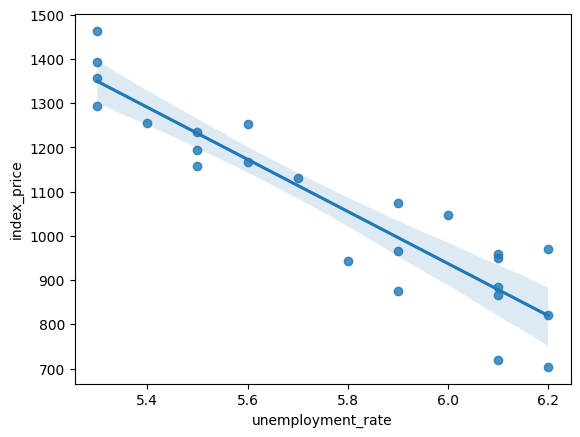

In [99]:
sns.regplot(x='unemployment_rate', y='index_price', data=df)

## Standardization

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
## create an instance
scale = StandardScaler()

## fit on training data only
scale.fit(X_train)

## # Transform both training and testing data using the same fitted scaler
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [102]:
## mean of scaled training data (should be close to 0)
X_train_scaled.mean()

np.float64(3.885780586188048e-16)

In [103]:
## standard deviation of scaled training data (should be close to 1)
X_train_scaled.std()

np.float64(1.0)

In [104]:
X_train_scaled.shape, X_test_scaled.shape

((18, 2), (6, 2))

## Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model = LinearRegression(n_jobs=-1)  ## create an instance

model.fit(X_train_scaled, y_train)   ### train our model

LinearRegression(n_jobs=-1)

### Now how much our Model id train (fitted), to check we are going to use Cross Validation Technique

Cross Validation is a technique that **evaluate the performance of our model accurately**

### How it works??

1. divide the data into K equal parts(i.e K=5)
2. In each Round:
    * 1 part ko test set banata hai.
    * remaining (K-1) parts ko train set
3. this process repeated K times
4. in each round Performance score is calculated
5. and finally calculate average score, and estimate the final performane.

In [ ]:
### for validation technique using r2 score

from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(
    estimator=model,
    X = X_train_scaled,
    y = y_train,
    scoring='r2',    ## it can be anything like : mean square error
    cv=5            ## it gives 5 performance score
)

In [109]:
validation_score

array([0.96373611, 0.68310264, 0.80679599, 0.79355092, 0.96849166])

In [110]:
np.mean(validation_score)

np.float64(0.8431354650801491)

In [ ]:
### for validation technique using neg_mean_squared_error

from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(
    estimator=model,
    X = X_train_scaled,
    y = y_train,
    scoring='neg_mean_squared_error',    ## it can be anything like : mean square error
    cv=5            ## it gives 5 performance score
)

np.mean(validation_score)  ## mean of validation score


np.float64(-5649.115244350756)

In [112]:
y_pred = model.predict(X_test_scaled)  ## make predictions on test data

In [ ]:
y_pred  ## predicted values for test data

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [ ]:
y_test  ## actual values for test data

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [118]:
### error between predicted and actual values

error = y_test - y_pred  ## error in prediction
error

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

In [ ]:
#### performance matrics
from sklearn.metrics import mean_squared_erro